In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.colors import LinearSegmentedColormap

In [ ]:
#Reading the dataset
df = pd.read_excel("raw_data.xlsx", sheet_name= "Case Study Dataset", header=1)
df.head(                    )

,Unnamed: 0,Month,Average Licensed Bed Occupancy Rate,"Unassisted Fall Rate per 1,000 Patient Days",Staff Responsiveness Domain Top Box Score,Unassisted Fall %,Staff Responsiveness Domain Top Box Score %,Staff Responsiveness Top Box Score Benchmark
0,NaN,2020-01-01,0.96,2.21,68.34,0.221,0.6834,65
1,NaN,2020-02-01,0.96,1.79,72.75,0.179,0.7275,65
2,NaN,2020-03-01,0.81,1.03,67.07,0.103,0.6707,65
3,NaN,2020-04-01,0.94,1.97,71.21,0.197,0.7121,65
4,NaN,2020-05-01,1.01,3.41,57.68,0.341,0.5768,65


# Data Cleaning and Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   Unnamed: 0                                    0 non-null      float64       
 1   Month                                         60 non-null     datetime64[ns]
 2   Average Licensed Bed  Occupancy Rate          60 non-null     float64       
 3   Unassisted Fall Rate per 1,000 Patient Days   60 non-null     float64       
 4   Staff Responsiveness Domain Top Box Score     60 non-null     float64       
 5   Unassisted Fall %                             60 non-null     float64       
 6   Staff Responsiveness Domain Top Box Score %   60 non-null     float64       
 7   Staff Responsiveness Top Box Score Benchmark  60 non-null     int64         
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 3.9 KB


Findings: There are no missing values in the columns but the unnamed: 0 column contains missing data.

In [4]:
#Dropping column with missing values
df.drop("Unnamed: 0", axis=1, inplace=True)

In [5]:
df.describe()

,Month,Average Licensed Bed Occupancy Rate,"Unassisted Fall Rate per 1,000 Patient Days",Staff Responsiveness Domain Top Box Score,Unassisted Fall %,Staff Responsiveness Domain Top Box Score %,Staff Responsiveness Top Box Score Benchmark
count,60,60.000000,60.000000,60.000000,60.000000,60.000000,60.0
mean,2022-06-16 15:12:00,0.962167,2.607833,63.087500,0.260783,0.630875,65.0
min,2020-01-01 00:00:00,0.810000,1.030000,53.310000,0.103000,0.533100,65.0
25%,2021-03-24 06:00:00,0.950000,2.310000,60.342500,0.231000,0.603425,65.0
50%,2022-06-16 00:00:00,0.960000,2.590000,63.620000,0.259000,0.636200,65.0
75%,2023-09-08 12:00:00,0.980000,3.030000,65.992500,0.303000,0.659925,65.0
max,2024-12-01 00:00:00,1.010000,3.410000,72.750000,0.341000,0.727500,65.0
std,NaN,0.028409,0.500712,4.148518,0.050071,0.041485,0.0


Findings: The mean and median is almost similar indicating this to be a normal distribution.

In [6]:
#Checking for duplicate values
df[df.duplicated()]

,Month,Average Licensed Bed Occupancy Rate,"Unassisted Fall Rate per 1,000 Patient Days",Staff Responsiveness Domain Top Box Score,Unassisted Fall %,Staff Responsiveness Domain Top Box Score %,Staff Responsiveness Top Box Score Benchmark


Findings: The dataset contains no duplicate values

In [7]:
# Renaming the columns
df.columns = ["Month", "KPI1", "KPI2", "KPI3", "KPI2_perc", "KPI3_perc", "KPI3_Benchmark"]

In [8]:
df.head()

,Month,KPI1,KPI2,KPI3,KPI2_perc,KPI3_perc,KPI3_Benchmark
0,2020-01-01,0.96,2.21,68.34,0.221,0.6834,65
1,2020-02-01,0.96,1.79,72.75,0.179,0.7275,65
2,2020-03-01,0.81,1.03,67.07,0.103,0.6707,65
3,2020-04-01,0.94,1.97,71.21,0.197,0.7121,65
4,2020-05-01,1.01,3.41,57.68,0.341,0.5768,65


In [9]:
df.drop(columns=["KPI2_perc", "KPI3_perc", "KPI3_Benchmark"], inplace=True)

In [10]:
df.head()

,Month,KPI1,KPI2,KPI3
0,2020-01-01,0.96,2.21,68.34
1,2020-02-01,0.96,1.79,72.75
2,2020-03-01,0.81,1.03,67.07
3,2020-04-01,0.94,1.97,71.21
4,2020-05-01,1.01,3.41,57.68


In [11]:
#Multiplying the KPI values with 100 to convert it to perc values
df["KPI1"] = df["KPI1"]* 100

In [12]:
df["KPI1"].describe()

count     60.000000
mean      96.216667
std        2.840934
min       81.000000
25%       95.000000
50%       96.000000
75%       98.000000
max      101.000000
Name: KPI1, dtype: float64

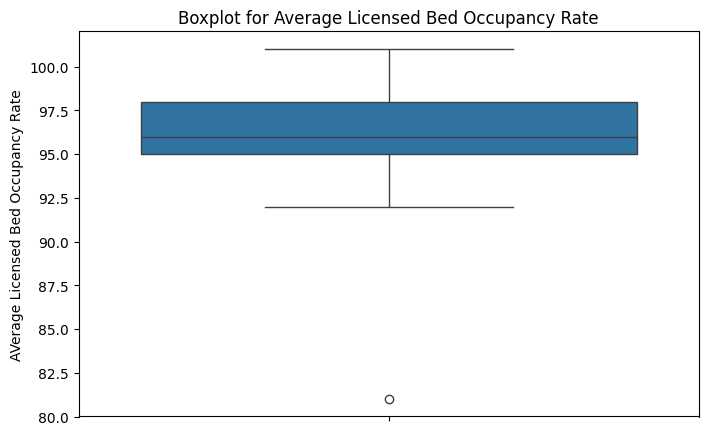

In [13]:
#Creating Boxplot to detect outliers
plt.figure(figsize=(8,5))
sns.boxplot(df["KPI1"])

#Formatting the chart
plt.title("Boxplot for Average Licensed Bed Occupancy Rate")
plt.ylabel("AVerage Licensed Bed Occupancy Rate")
plt.show()

In [14]:
df[df["KPI1"] < 90]

,Month,KPI1,KPI2,KPI3
2,2020-03-01,81.0,1.03,67.07


In [15]:
df["KPI2"].describe()

count    60.000000
mean      2.607833
std       0.500712
min       1.030000
25%       2.310000
50%       2.590000
75%       3.030000
max       3.410000
Name: KPI2, dtype: float64

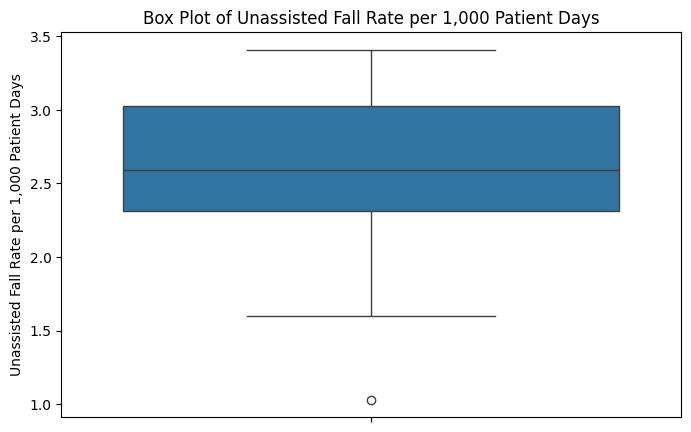

In [16]:
#Creating Boxplot to detect outliers
plt.figure(figsize=(8,5))
sns.boxplot(df["KPI2"])

#Formatting the chart
plt.title("Box Plot of Unassisted Fall Rate per 1,000 Patient Days")
plt.ylabel("Unassisted Fall Rate per 1,000 Patient Days")
plt.show()

In [17]:
df[df["KPI2"] < 1.5]

,Month,KPI1,KPI2,KPI3
2,2020-03-01,81.0,1.03,67.07


In [18]:
df["KPI3"].describe()

count    60.000000
mean     63.087500
std       4.148518
min      53.310000
25%      60.342500
50%      63.620000
75%      65.992500
max      72.750000
Name: KPI3, dtype: float64

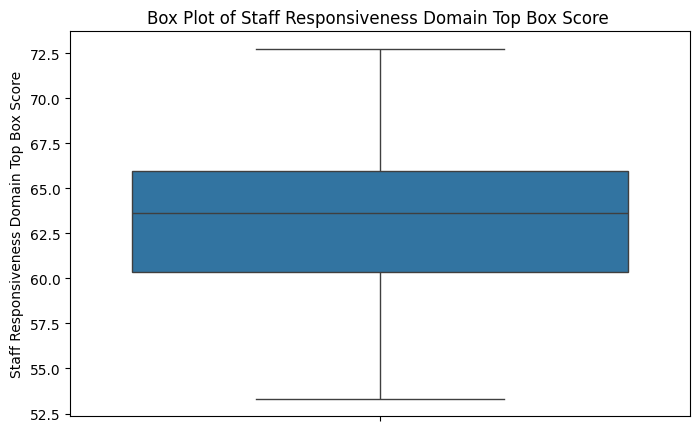

In [19]:
#Creating Boxplot to detect outliers
plt.figure(figsize=(8,5))
sns.boxplot(df["KPI3"])

#Formatting the chart
plt.title("Box Plot of Staff Responsiveness Domain Top Box Score ")
plt.ylabel("Staff Responsiveness Domain Top Box Score")
plt.show()

Findings: There are no oultiers in KPI3.
The outlier for both KPI 1 and KPI 2 is the same which is the month of march, 2020

<Figure size 1000x600 with 0 Axes>

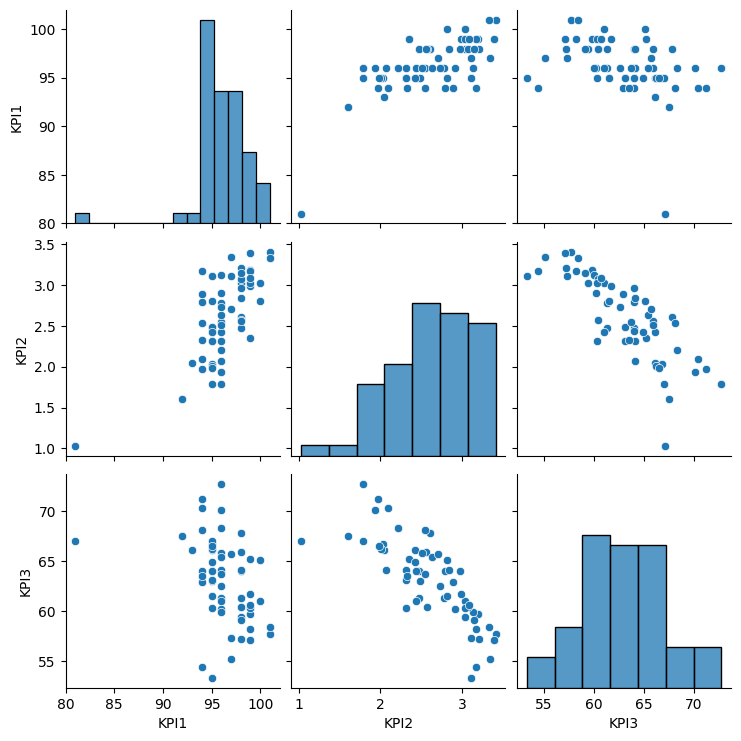

In [20]:
plt.figure(figsize=(10,6))
sns.pairplot(df)
plt.show()

In [21]:
df[["KPI1", "KPI2", "KPI3"]].corr()

,KPI1,KPI2,KPI3
KPI1,1.000000,0.700112,-0.371821
KPI2,0.700112,1.000000,-0.791340
KPI3,-0.371821,-0.791340,1.000000


Findings: KPI 1 and KPI 2 have strong positive correlation and KPI 2 and KPI 3 have strong negative correlation.

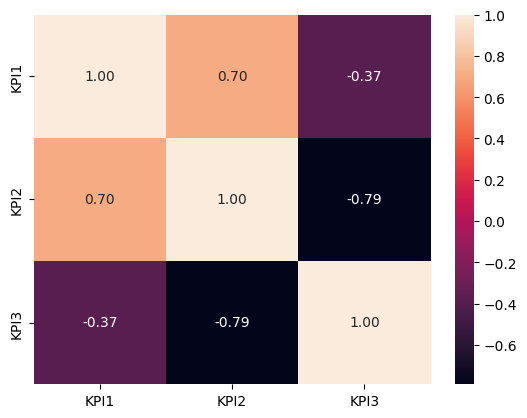

In [22]:
colors = ["#2a9d8f", "#e9f5ef", "#e76f51"]  # Green to white to red
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

sns.heatmap(df[["KPI1", "KPI2", "KPI3"]].corr(), annot=True, fmt=".2f")
plt.savefig("KPI_heatmap.png", dpi=300, bbox_inches="tight")
plt.show()



# Findings

1. The correlation between bed occupancy rate and fall rate per 1000 days is 0.70 which indicates a strong positive correlation. It means that with increase in bed occupancy the fall rate would increase as well. To mitigate this, there is a need for more efficient staffing or patient monmitoring in case the occupancy increases.

2. The correlation between bed occupancy rate and staff responsiveness is -0.37 indicating a moderate negative correlation. It means that staff responsiveness tend to decrease with higher bed occupancy rate. The hospital need a better resource management.

3. The correlation between fall rate per 1000 days and staff responsiveness is -0.79 indicating a strong negative correlation. It means that the higher the staff responsiveness the lower the fall rate.

Summary: 

When the hospital operate at higher occupancy level, the fall rate tend to rise while staff responsiveness declines slightly. Improved staff responsivess decreases patient falls which would contribute to improved patient safety trhough reduced patient fall incidents.

# Trends in KPIs overtime

# Average Licensed bed occupancy rate

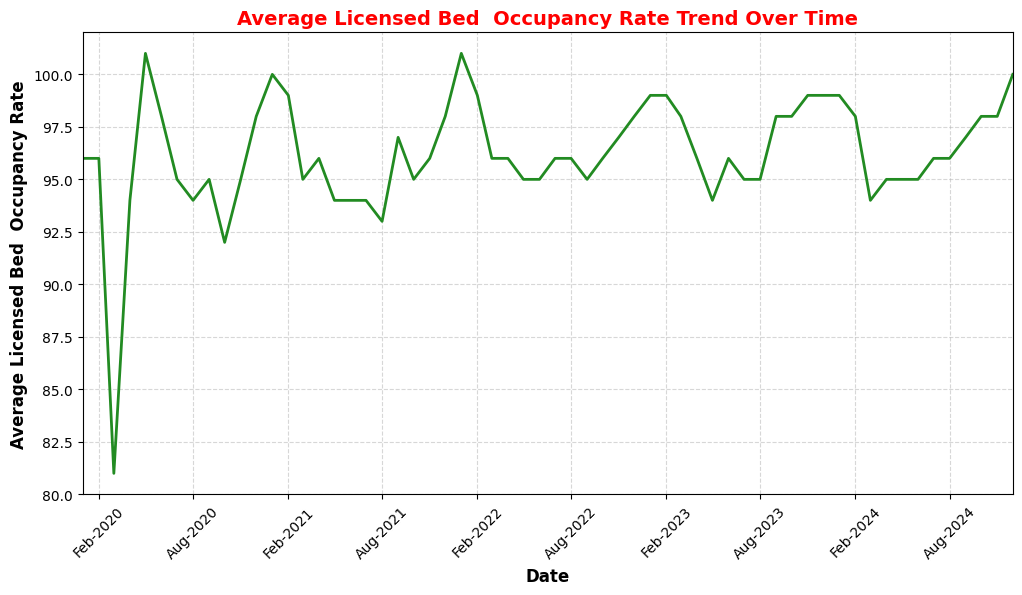

In [23]:
plt.figure(figsize=(12,6))

#Creating a lineplot
sns.lineplot(data=df, x= "Month", y="KPI1", color="forestgreen", linewidth=2)

#Customizing labels and title
plt.xlabel("Date", fontsize=12, fontweight="bold")
plt.ylabel("Average Licensed Bed  Occupancy Rate", fontsize=12, fontweight="bold")
plt.title("Average Licensed Bed  Occupancy Rate Trend Over Time", fontsize=14, fontweight="bold", color="red")

#Formatt
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))  # Month-Year format
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))

#Setting up minimum and maximum values for the x-axis
plt.xlim(df["Month"].min(), df["Month"].max())

#Showing grid
plt.grid(True, linestyle="--", alpha=0.5)

#Rotating the xticks for better readability
plt.xticks(rotation=45)

plt.show()

In [24]:
#Extracting month name
df["Month_name"] = df["Month"].dt.month_name()

In [25]:
KPI1_by_month = df.groupby("Month_name")["KPI1"].mean()

month_order = [
    "January", "February", "March", "April", "May", "June", 
    "July", "August", "September", "October", "November", "December"
]

KPI1_by_month = KPI1_by_month.reindex(month_order)
KPI1_by_month

Month_name
January      99.0
February     98.2
March        92.8
April        95.4
May          95.8
June         95.6
July         95.2
August       94.8
September    96.4
October      95.8
November     97.0
December     98.6
Name: KPI1, dtype: float64

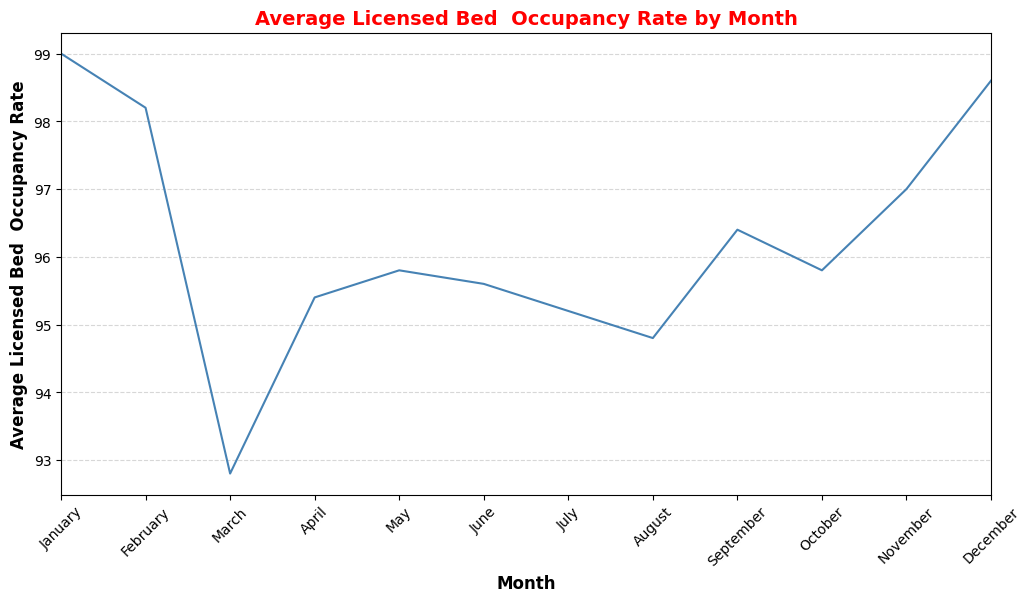

In [26]:
plt.figure(figsize=(12, 6))

sns.lineplot(x=KPI1_by_month.index, y=KPI1_by_month.values, color="steelblue")

#Customizing labels and title
plt.xlabel("Month", fontsize=12, fontweight="bold")
plt.ylabel("Average Licensed Bed  Occupancy Rate", fontsize=12, fontweight="bold")
plt.title("Average Licensed Bed  Occupancy Rate by Month", fontsize=14, fontweight="bold", color="red")

#Setting up the start and end date on the x-axis
plt.xlim("January", "December")

#Rotating the xticks for better readability
plt.xticks(rotation=45)

#SHowing gridlines
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

In [27]:
#Extracting month from date
df["year"] = df["Month"].dt.year

In [28]:
#Grouping the values by year
KPI1_by_year = df.groupby("year")["KPI1"].mean().round(3)
KPI1_by_year

year
2020    94.583
2021    95.917
2022    96.667
2023    97.167
2024    96.750
Name: KPI1, dtype: float64

C:\Users\tabis\AppData\Local\Temp\ipykernel_20108\2557944895.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=KPI1_by_year.index, y= KPI1_by_year.values, palette = "pastel", width=0.5)


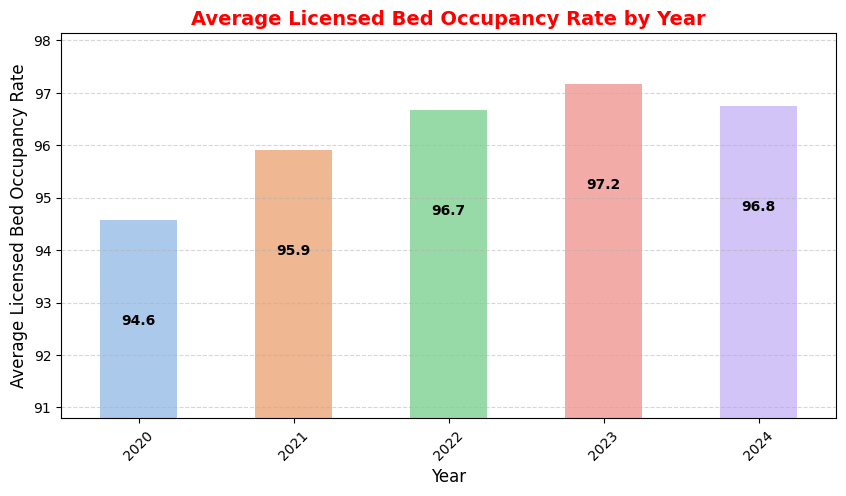

In [67]:
plt.figure(figsize=(10, 5))

#Creating barplots for years
sns.barplot(x=KPI1_by_year.index, y= KPI1_by_year.values, palette = "pastel", width=0.5)

#Adjusting y-axis values
plt.ylim(KPI1_by_year.min() * 0.96, KPI1_by_year.max() * 1.01)

#Customizing labels and title
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Licensed Bed Occupancy Rate", fontsize=12)
plt.title("Average Licensed Bed Occupancy Rate by Year", fontsize=14, fontweight="bold", color="red")

#Adding values in the bar
for i, value in enumerate(KPI1_by_year.values):
    plt.text(i, value - 2, f"{value:.1f}", ha="center", fontsize=10, fontweight="bold")
    

#Rotating the xticks for better readability
plt.xticks(rotation=45)
    
#SHowing gridlines
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

# Unassisted Fall Rate per 1000 days

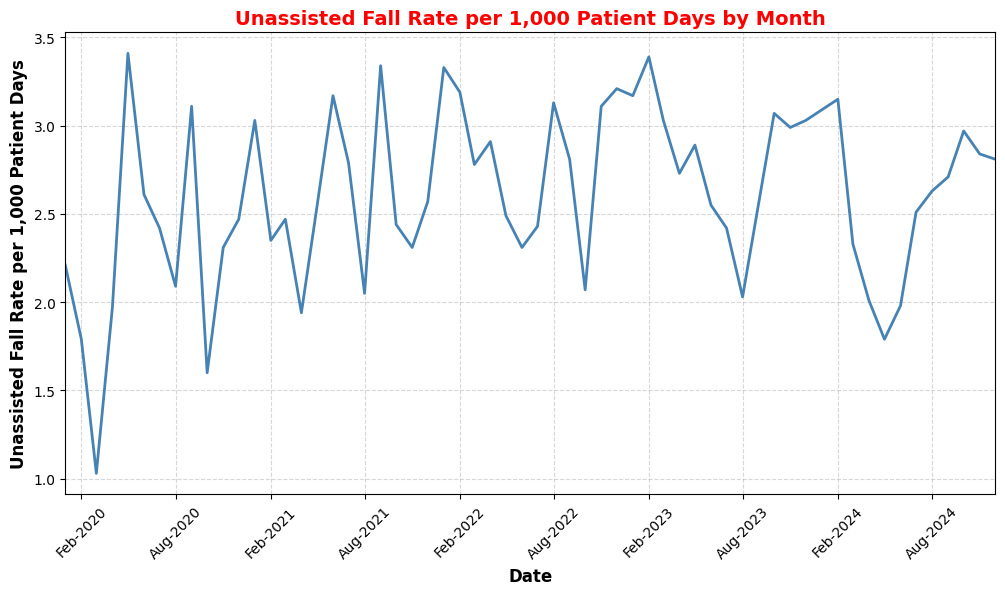

In [36]:
plt.figure(figsize=(12,6))

#Creating a lineplot
sns.lineplot(data=df, x= "Month", y="KPI2", color="steelblue", linewidth=2)

#Customizing labels and title
plt.xlabel("Date", fontsize=12, fontweight="bold")
plt.ylabel("Unassisted Fall Rate per 1,000 Patient Days", fontsize=12, fontweight="bold")
plt.title("Unassisted Fall Rate per 1,000 Patient Days by Month", fontsize=14, fontweight="bold", color="red")

#Formatt
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))  # Month-Year format
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))

#Setting up minimum and maximum values for the x-axis
plt.xlim(df["Month"].min(), df["Month"].max())

#Showing grid
plt.grid(True, linestyle="--", alpha=0.5)

#Rotating the xticks for better readability
plt.xticks(rotation=45)

plt.show()

In [31]:
KPI2_by_month = df.groupby("Month_name")["KPI2"].mean()

KPI2_by_month = KPI2_by_month.reindex(month_order)
KPI2_by_month

Month_name
January      2.966
February     2.774
March        2.328
April        2.312
May          2.624
June         2.524
July         2.514
August       2.386
September    2.906
October      2.430
November     2.712
December     2.818
Name: KPI2, dtype: float64

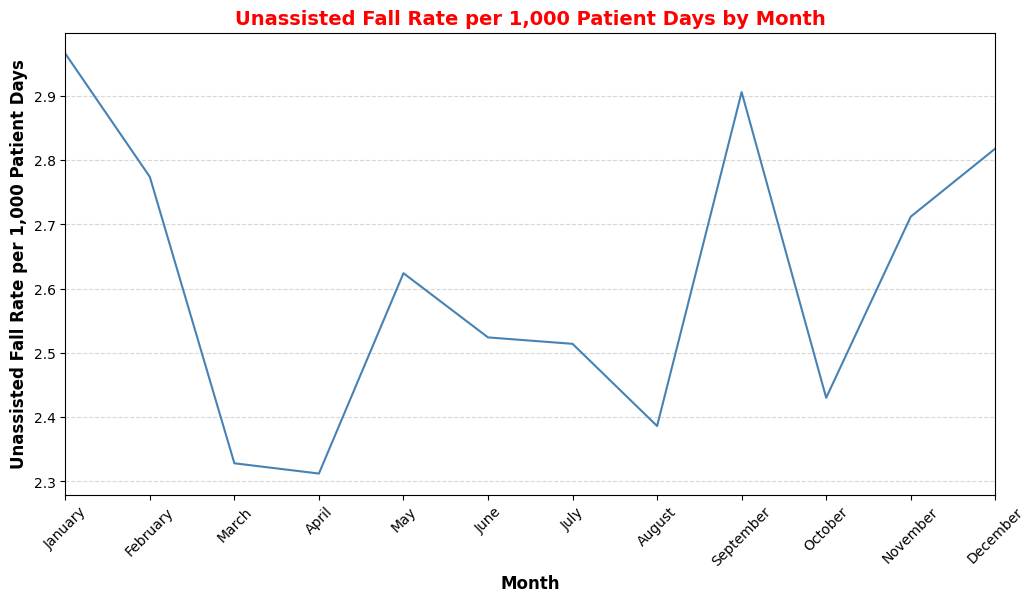

In [ ]:
plt.figure(figsize=(12, 6))

sns.lineplot(x=KPI2_by_month.index, y=KPI2_by_month.values, color="steelblue")

#Customizing labels and title
plt.xlabel("Month", fontsize=12, fontweight="bold")
plt.ylabel("Unassisted Fall Rate per 1,000 Patient Days", fontsize=12, fontweight="bold")
plt.title("Unassisted Fall Rate per 1,000 Patient Days", fontsize=14, fontweight="bold", color="red")

#Setting up the start and end date on the x-axis
plt.xlim("January", "December")

#Rotating the xticks for better readability
plt.xticks(rotation=45)

#SHowing gridlines
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

In [33]:
KPI2_by_year = df.groupby("year")["KPI2"].mean().round(2)
KPI2_by_year

year
2020    2.25
2021    2.58
2022    2.81
2023    2.82
2024    2.57
Name: KPI2, dtype: float64

C:\Users\tabis\AppData\Local\Temp\ipykernel_20108\2442665449.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=KPI2_by_year.index, y= KPI2_by_year.values, palette = "pastel", width=0.5)


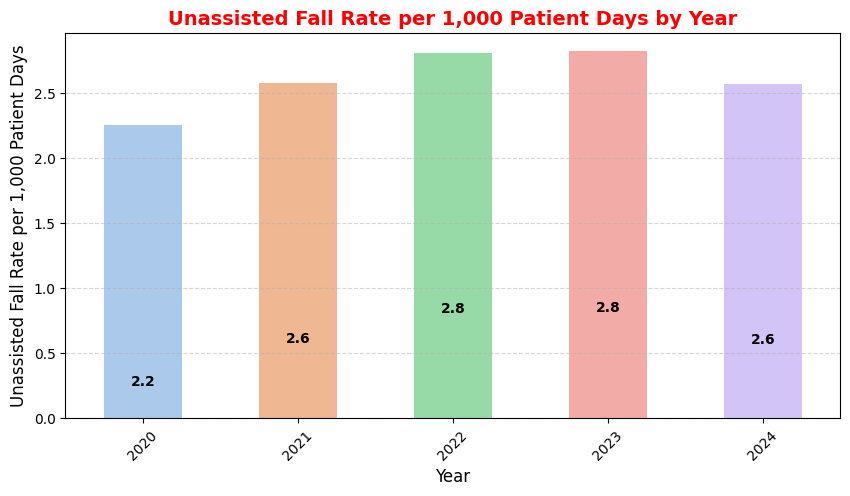

In [34]:
plt.figure(figsize=(10, 5))

#Creating barplots for years
sns.barplot(x=KPI2_by_year.index, y= KPI2_by_year.values, palette = "pastel", width=0.5)

#Adjusting y-axis values
#plt.ylim(KPI1_by_year.min() * 0.96, KPI1_by_year.max() * 1.01)

#Customizing labels and title
plt.xlabel("Year", fontsize=12)
plt.ylabel("Unassisted Fall Rate per 1,000 Patient Days", fontsize=12)
plt.title("Unassisted Fall Rate per 1,000 Patient Days by Year", fontsize=14, fontweight="bold", color="red")

#Adding values in the bar
for i, value in enumerate(KPI2_by_year.values):
    plt.text(i, value - 2, f"{value:.1f}", ha="center", fontsize=10, fontweight="bold")
    

#Rotating the xticks for better readability
plt.xticks(rotation=45)
    
#SHowing gridlines
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

# Staff Responsiveness Top Box Score

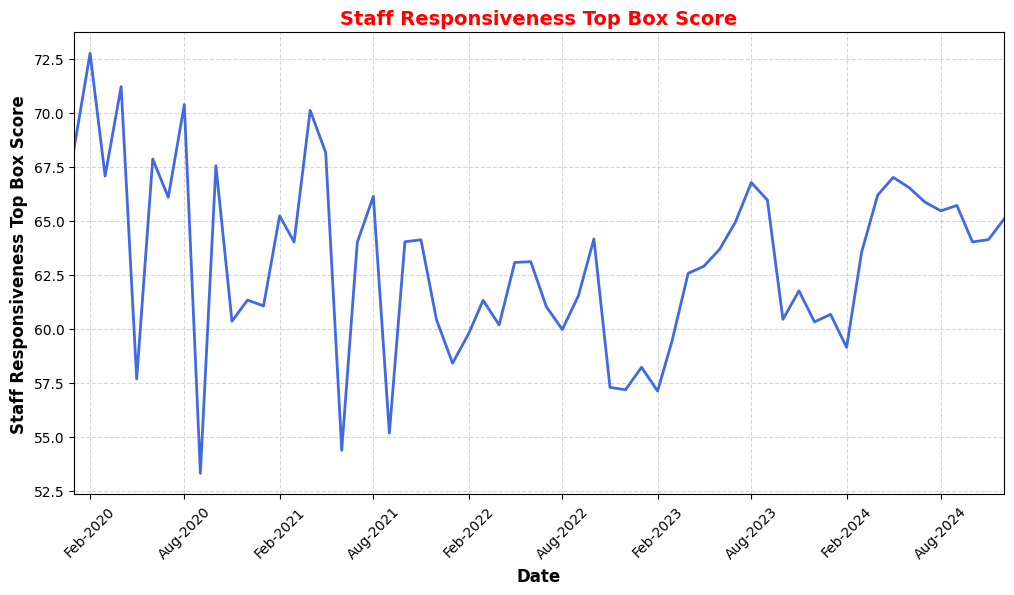

In [38]:
plt.figure(figsize=(12,6))

#Creating a lineplot
sns.lineplot(data=df, x= "Month", y="KPI3", color="royalblue", linewidth=2)

#Customizing labels and title
plt.xlabel("Date", fontsize=12, fontweight="bold")
plt.ylabel("Staff Responsiveness Top Box Score", fontsize=12, fontweight="bold")
plt.title("Staff Responsiveness Top Box Score", fontsize=14, fontweight="bold", color="red")

#Formatt
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))  # Month-Year format
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))

#Setting up minimum and maximum values for the x-axis
plt.xlim(df["Month"].min(), df["Month"].max())

#Showing grid
plt.grid(True, linestyle="--", alpha=0.5)

#Rotating the xticks for better readability
plt.xticks(rotation=45)

plt.show()

In [40]:
KPI3_by_month = df.groupby("Month_name")["KPI3"].mean()

KPI3_by_month = KPI3_by_month.reindex(month_order)
KPI3_by_month

Month_name
January      61.340
February     62.802
March        63.082
April        66.052
May          63.762
June         63.114
July         64.384
August       65.742
September    60.336
October      64.040
November     61.530
December     60.866
Name: KPI3, dtype: float64

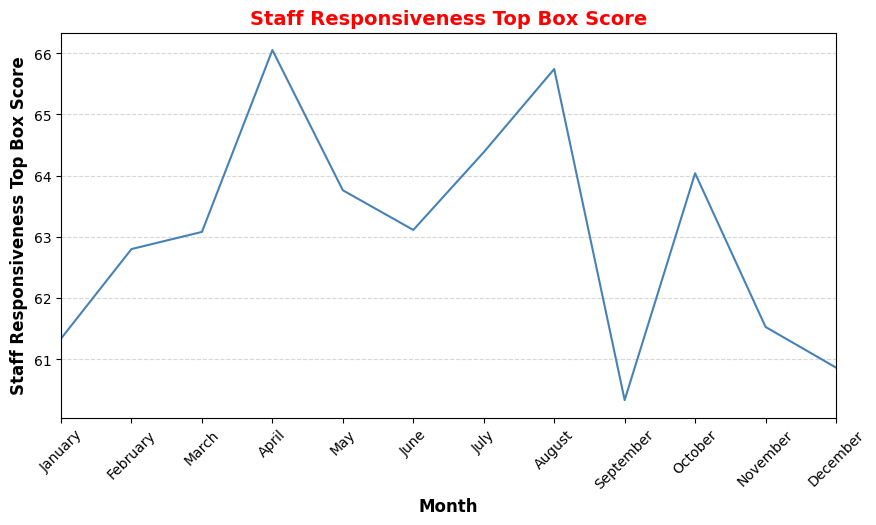

In [44]:
plt.figure(figsize=(10, 5))

sns.lineplot(x=KPI3_by_month.index, y=KPI3_by_month.values, color="steelblue")

#Customizing labels and title
plt.xlabel("Month", fontsize=12, fontweight="bold")
plt.ylabel("Staff Responsiveness Top Box Score", fontsize=12, fontweight="bold")
plt.title("Staff Responsiveness Top Box Score", fontsize=14, fontweight="bold", color="red")

#Setting up the start and end date on the x-axis
plt.xlim("January", "December")

#Rotating the xticks for better readability
plt.xticks(rotation=45)

#SHowing gridlines
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

In [45]:
KPI3_by_year = df.groupby("year")["KPI3"].mean().round(2)
KPI3_by_year

year
2020    65.33
2021    63.07
2022    60.58
2023    62.01
2024    64.45
Name: KPI3, dtype: float64

C:\Users\tabis\AppData\Local\Temp\ipykernel_20108\329637488.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=KPI3_by_year.index, y= KPI3_by_year.values, palette = "pastel", width=0.5)


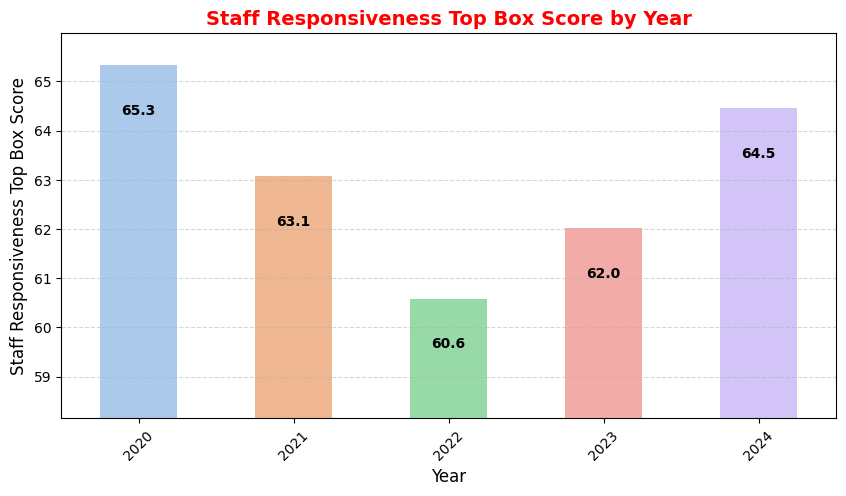

In [57]:
plt.figure(figsize=(10, 5))

#Creating barplots for years
sns.barplot(x=KPI3_by_year.index, y= KPI3_by_year.values, palette = "pastel", width=0.5)

#Adjusting y-axis values
plt.ylim(KPI3_by_year.min() * 0.96, KPI3_by_year.max() * 1.01)

#Customizing labels and title
plt.xlabel("Year", fontsize=12)
plt.ylabel("Staff Responsiveness Top Box Score", fontsize=12)
plt.title("Staff Responsiveness Top Box Score by Year", fontsize=14, fontweight="bold", color="red")

#Adding values in the bar
for i, value in enumerate(KPI3_by_year.values):
    plt.text(i, value - 1, f"{value:.1f}", ha="center", fontsize=10, fontweight="bold")
    

#Rotating the xticks for better readability
plt.xticks(rotation=45)
    
#SHowing gridlines
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

# Benchmark Discussion and Insights

1. Average Licensed Bed Occupancy Rate

Your Hospital: 96.22%

U.S. Benchmark: 66%

Insights: The hospital's occupancy runs above than the national average showing both storing coomunity need and effective bed management. However, a sustained high occupancy can adversely affect the care environment via increased pressure on staff and reduced patient satisfaction.

2. Unassisted Fall Rate per 1,000 Patient Days

Your hospital: 2.61 falls per 1,000 patient days

Benchmark: 2.3 – 13 falls per 1,000 patient days

Insights: The fall rate of the hospital is on the lower side of the national average range. It shows effective  safety protocols and prevention initiatives. It is critical to maintain continuous surveillance to mitigate such incidence in case of increased bed occupancy.

3. Staff Responsiveness Domain Top Box Score

Your hospital: 63.09%

Benchmark: 85% – 90%

Insights: The response rate of that the staff is significantly lower than the indistry standards which shows potential delay in patient care delivery. The elevated bed occupancy rate puts constraints on the hospital staff. Improving staff levels, sharing patient update faster, and communicating when extra help is needed can improve the metric and patient experiences.

Final Assessment
Increased bed occupancy and decreased staff responsiveness shows strain on the hospital staff.
Unassisted fall rate is lower even though the bed occupancy is high.
To enhance patient satisfaction and overall hospital efficiency, improved staff responsiveness is needed.

In [64]:
df.to_csv("Healthcare_data.csv", index=False)